**Veri Yoğun Uygulamalar Modül Projesi**

In [ ]:
import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

Burada Webscrapping yaparak ilgili sayfadan sektör adlarını ve hisse senetleri çekip bir dataframe yaptık ve sonrasında kaydettik

In [ ]:
fetch_data(sectors='energy').to_csv('../data/stock_sectors/energy.csv')
fetch_data(sectors='financials').to_csv('../data/stock_sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv('../data/stock_sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')
fetch_data(sectors='utilities').to_csv('../data/stock_sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv('../data/stock_sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv('../data/stock_sectors/materials.csv')
fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')
fetch_data(sectors='industrials').to_csv('../data/stock_sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('../data/stock_sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('../data/stock_sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('../data/stock_sectors/communication-services.csv')

Burada kaydettiğim hisse sentlerininden ilk başta yfinaceda o verinin olup olmadığını kontrol ettim çünkü bazı verilerde BRK.B gibi BRK-B şeklinde yazınca finans verisi ortaya çıkıyordu.Hata veren verileri elemeye ve uygun olanları listelemeye çalıştım.

In [ ]:
list=[]
import yfinance
import pandas as pd
s=0
for i in pd.read_csv("/content/financials.csv").Symbol:
    ticker=yfinance.Ticker(str(i).replace(".","-"))
    data=ticker.history(start='2005-01-01',end='2023-01-01',interval='1mo')
    if data.empty or str(i)=='NaN' or  str(i)=='nan' or str(i)=='LENZ':
        continue
    else:
        list.append(i.replace(".","-"))
        s=s+1
    if s==600:
        break
df=pd.DataFrame(list,columns=['Symbol'])
df.to_csv("Finansliste.csv",index=False)#burada finans sağlık teknoloji için 600 tane veri çekiyorum ve bunu dosyaladım


Burada her sektör için öznitelik çıkarıyorum uzun sürdüğü için dosyalama yaptım. Yfinancedan verileri toplu çekip döngüde parçalayıp teker teker feature extraction yaptım. 783 tane öznitelik oldu. Burada tüm öznitelik çıkarmaları koymadım sadece dosya yolu değiştirerek kaydettim hepsinde aynı işlem uygulandı.

In [ ]:
import pandas as pd
import yfinance as yl
finansdf=yl.download([i for i in pd.read_csv("/content/Finansliste.csv").Symbol],start='2005-01-01')['Close']

[*********************100%***********************]  600 of 600 completed


In [ ]:
'''import numpy as np

finansdf=np.log(finansdf.bfill().ffill())
for i in finansdf.columns:
  if finansdf[i].isna().sum()!=0:
    print(finansdf[i])'''

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np


s=0
from tsfresh import extract_features
final_features = pd.DataFrame()
for i in finansdf.columns:

    s=s+1
    newdf=pd.DataFrame(finansdf[i])
    # 'Date' sütununu resetleyelim ve 'Stock' kimliği ekleyelim
    newdf.reset_index(inplace=True)
    newdf['Stock'] = i  # Sadece bir hisse senedi olduğu için sabit bir ID ekliyoruz

    # 'Date' sütununu datetime formatına çevirelim
    newdf['Date'] = pd.to_datetime(newdf['Date'])

    # Eksik verileri kontrol edelim ve dolduralım


    # Özellik çıkarma işlemi
    extracted_features = extract_features(newdf, column_id='Stock', column_sort='Date', disable_progressbar=True, show_warnings=False)
    extracted_features.columns = [col.split('__')[1] if '__' in col else col for col in extracted_features.columns]
    final_features = pd.concat([final_features, extracted_features], axis=0)
    print(s)
    # Çıkarılan özellikleri görelim

print(final_features)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92
93


94


95


96


97


98


99


100


101


102


103


104


105


106


107


108


109


110


111


112


113


114


115


116


117


118


119


120


121


122


123


124


125


126


127


128


129


130


131


132


133


134


135


136


137


138


139


140


141


142


143


144


145


146


147


148


149


150


151


152


153


154


155


156


157


158


159


160


161


162


163


164


165


166


167


168


169


170


171


172


173


174


175


176


177


178


179


180


181


182


183


184


185


186


187


188


189


190


191


192


193


194


195


196


197


198


199


200


201


202


203


204


205


206


207


208


209


210


211


212


213


214


215


216


217


218


219


220


221


222


223


224


225


226


227


228


229


230


231


232


233


234


235


236


237


238


239


240


241


242


243


244


245


246


247


248


249


250


251


252


253


254


255


256


257


258


259


260


261


262


263


264


265


266


267


268


269


270


271


272


273


274


275


276


277


278


279


280


281


282


283


284


285


286


287


288


289


290


291


292


293


294


295


296


297


298


299


300


301


302


303


304


305


306


307


308


309


310


311


312


313


314


315


316


317


318


319


320


321


322


323


324


325


326


327


328


329


330


331


332


333


334


335


336


337


338


339


340


341


342


343


344


345


346


347


348


349


350


351


352


353


354


355


356


357


358


359


360


361


362


363


364


365


366


367


368


369


370


371


372


373


374


375


376


377


378


379


380


381


382


383


384


385


386


387


388


389


390


391


392


393


394


395


396


397


398


399


400


401


402


403


404


405


406


407


408


409


410


411


412


413


414


415


416


417


418


419


420


421


422


423


424


425


426


427


428


429


430


431


432


433


434


435


436


437


438
439


440


441


442


443


444


445


446


447
448


449


450


451


452


453


454


455


456


457


458


459


460


461


462


463


464


465


466


467


468


469


470


471


472


473


474


475


476


477


478


479


480


481


482


483


484


485


486


487


488


489


490


491


492


493


494


495


496


497


498


499


500


501


502


503


504


505


506


507


508


509


510


511


512


513


514


515


516


517


518


519


520


521


522


523


524


525


526


527


528


529


530


531


532


533


534


535


536


537


538


539


540


541


542


543


544


545


546


547


548


549


550


551


552


553


554


555


556


557


558


559


560


561


562


563


564


565


566


567


568


569


570


571


572


573


574


575


576


577


578


579


580


581


582


583


584


585


586


587


588


589


590


591


592


593


594


595


596


597


598


599
600
      variance_larger_than_standard_deviation  has_duplicate_max  \
AAMI                                      0.0                0.0   
AB                                        0.0                0.0   
ABCB                                      0.0                0.0   
ABL                                       0.0                0.0   
AC                                        0.0                0.0   
...                                       ...                ...   
WULF                                      0.0                0.0   
XP                                        0.0                0.0   
XYF                                       1.0                1.0   
YRD                                       0.0                0.0   
ZION                                      0.0                0.0   

      has_duplicate_min  has_duplicate    sum_values    abs_energy  \
AAMI                0.0            1.0  13458.654026  36130.002000   
AB                  0.0            

In [ ]:
import pandas as pd
final_features.to_csv('finanssfeature.csv')

In [ ]:
import pandas as pd
import yfinance as yl
finansdf=yl.download([i.replace(".","-") for i in pd.read_csv("/content/materials.csv").Symbol],start='2005-01-01')['Close']
import numpy as np

finansdf=np.log(finansdf.bfill().ffill())
for i in finansdf.columns:
  if finansdf[i].isna().sum()!=0:
    print(finansdf[i])

[*********************100%***********************]  265 of 265 completed


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np


s=0
from tsfresh import extract_features
final_features = pd.DataFrame()
for i in finansdf.columns:

    s=s+1
    newdf=pd.DataFrame(finansdf[i])
    # 'Date' sütununu resetleyelim ve 'Stock' kimliği ekleyelim
    newdf.reset_index(inplace=True)
    newdf['Stock'] = i  # Sadece bir hisse senedi olduğu için sabit bir ID ekliyoruz

    # 'Date' sütununu datetime formatına çevirelim
    newdf['Date'] = pd.to_datetime(newdf['Date'])

    # Eksik verileri kontrol edelim ve dolduralım


    # Özellik çıkarma işlemi
    extracted_features = extract_features(newdf, column_id='Stock', column_sort='Date', disable_progressbar=True, show_warnings=False)
    extracted_features.columns = [col.split('__')[1] if '__' in col else col for col in extracted_features.columns]
    final_features = pd.concat([final_features, extracted_features], axis=0)
    print(s)
    # Çıkarılan özellikleri görelim

print(final_features)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70
71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


100


101


102


103


104


105


106


107


108


109


110


111


112


113


114


115


116


117


118


119


120


121


122


123


124


125


126


127


128


129


130


131


132


133


134


135


136


137


138


139


140
141


142


143


144


145


146


147


148


149


150


151


152


153


154


155


156


157


158


159


160


161


162


163


164


165


166


167


168


169


170


171


172


173


174


175


176


177


178


179


180


181


182


183


184


185


186


187


188


189


190


191


192


193


194


195


196


197


198


199


200


201


202


203


204


205


206


207


208


209


210


211


212


213


214


215


216


217


218


219


220


221


222


223


224


225


226


227


228


229


230


231


232


233


234


235


236


237


238


239


240


241


242


243


244


245


246


247


248


249


250


251


252


253


254


255


256


257


258


259


260


261


262


263


264
265
      variance_larger_than_standard_deviation  has_duplicate_max  \
AA                                        0.0                0.0   
ABAT                                      0.0                0.0   
ACNT                                      0.0                0.0   
AEM                                       0.0                0.0   
AG                                        0.0                0.0   
...                                       ...                ...   
WWR                                       1.0                0.0   
X                                         0.0                0.0   
XPL                                       0.0                0.0   
ZEUS                                      0.0                0.0   
ZKIN                                      0.0                0.0   

      has_duplicate_min  has_duplicate    sum_values     abs_energy  \
AA                  0.0            1.0  17608.516798   62441.010273   
ABAT                0.0          

In [ ]:
import pandas as pd
final_features.to_csv('/materfeature.csv')

Burada 3 sektörden 600 veri aldım ve özniteliklerini çıkarıp sınıflandırıp birleştirdim

In [ ]:
import pandas as pd
finans=pd.read_csv("/content/finanssfeature.csv")
finans['Sektör']=0
saglik=pd.read_csv("/content/saglikfeature.csv")
saglik['Sektör']=1
teknoloji=pd.read_csv("/content/teknolojifeature.csv")
teknoloji['Sektör']=2

Burda ise concat ettikten sonra index sıfırlama ve nan olan özellikleri dropluyorum

In [ ]:
df_concat = pd.concat([finans, saglik,teknoloji], axis=0)
df_concat = df_concat.rename(columns={'Unnamed: 0': 'Hisse'})
df_concat=df_concat.reset_index(drop=True)
nan_columns = df_concat.columns[df_concat.isna().any()].tolist()
df_concat = df_concat.drop(columns=nan_columns)
df_concat

Hisse  variance_larger_than_standard_deviation  has_duplicate_max  \
0     AAMI                                      0.0                0.0   
1       AB                                      0.0                0.0   
2     ABCB                                      0.0                0.0   
3      ABL                                      0.0                0.0   
4       AC                                      0.0                0.0   
...    ...                                      ...                ...   
1795  ZETA                                      0.0                0.0   
1796    ZI                                      0.0                1.0   
1797    ZM                                      0.0                0.0   
1798    ZS                                      0.0                0.0   
1799   ZUO                                      0.0                0.0   

      has_duplicate_min  has_duplicate    sum_values    abs_energy  \
0                   0.0            1.0  13458.654026  36130.002000   
1                   0.0            1.0  13334.119658  36910.841066   
2                   0.0            1.0  15467.279881  49595.831804   
3                   0.0            1.0  11494.123480  26122.496098   
4                   0.0            1.0  16973.316862  57047.272596   
...                 ...            ...           ...           ...   
1795                0.0            1.0  11191.637711  24936.974594   
1796                0.0            1.0  17650.505533  62014.900066   
1797                0.0            1.0  21835.145837  95279.584869   
1798                0.0            1.0  19906.582891  80884.590622   
1799                0.0            1.0  14377.106170  41310.566272   

      mean_abs_change  mean_change  mean_second_derivative_central  ...  \
0            0.008027     0.000137                    1.671886e-06  ...   
1            0.015544     0.000266                    5.149953e-06  ...   
2            0.018844     0.000325                    1.957094e-06  ...   
3            0.002589    -0.000044                    1.796670e-06  ...   
4            0.006925     0.000093                    5.992118e-06  ...   
...               ...          ...                             ...  ...   
1795         0.005761     0.000192                    9.455939e-06  ...   
1796         0.006340    -0.000236                    0.000000e+00  ...   
1797         0.007066     0.000062                    2.107136e-06  ...   
1798         0.008766     0.000365                   -7.375069e-07  ...   
1799         0.007997    -0.000137                    2.469796e-07  ...   

      fourier_entropy.2  fourier_entropy.3  fourier_entropy.4  \
0              0.136002           0.181214           0.546497   
1              0.090729           0.170467           0.429671   
2              0.090729           0.170467           0.440417   
3              0.125256           0.170467           0.316475   
4              0.170467           0.343950           1.038827   
...                 ...                ...                ...   
1795           0.090729           0.136002           0.425614   
1796           0.090729           0.170467           0.531534   
1797           0.090729           0.136002           0.305728   
1798           0.090729           0.090729           0.404122   
1799           0.136002           0.215617           0.497646   

      permutation_entropy  permutation_entropy.1  permutation_entropy.2  \
0                1.259392               2.021926               2.815916   
1                1.728502               2.964367               4.345398   
2                1.749650               3.027262               4.453849   
3                0.633669               0.991714               1.353202   
4                1.192390               1.904453               2.651837   
...                   ...                    ...                    ...   
1795             0.596700               0.903386               1.197

Burda ise L1 ile feature seçimi yapıyorum ve seçilmiş featureları listeleyip yeni dataframe oluşturuyorum

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
X = df_concat.drop(columns=['Sektör']).drop(columns=['Hisse'])
y = df_concat['Sektör']

# Veriyi eğitim ve test setlerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sel=SelectFromModel(LogisticRegression(penalty='l1',C=100,solver='liblinear'))
sel.fit(X,y)
df_concat=df_concat[['Hisse']+list(sel.get_feature_names_out())+['Sektör']]
df_concat.to_csv("df_concatall.csv")
df_concat


Hisse  variance_larger_than_standard_deviation  has_duplicate_max  \
0     AAMI                                      0.0                0.0   
1       AB                                      0.0                0.0   
2     ABCB                                      0.0                0.0   
3      ABL                                      0.0                0.0   
4       AC                                      0.0                0.0   
...    ...                                      ...                ...   
1795  ZETA                                      0.0                0.0   
1796    ZI                                      0.0                1.0   
1797    ZM                                      0.0                0.0   
1798    ZS                                      0.0                0.0   
1799   ZUO                                      0.0                0.0   

      has_duplicate_min  has_duplicate    sum_values    abs_energy    median  \
0                   0.0            1.0  13458.654026  36130.002000  2.551838   
1                   0.0            1.0  13334.119658  36910.841066  2.602827   
2                   0.0            1.0  15467.279881  49595.831804  3.092179   
3                   0.0            1.0  11494.123480  26122.496098  2.273156   
4                   0.0            1.0  16973.316862  57047.272596  3.218937   
...                 ...            ...           ...           ...       ...   
1795                0.0            1.0  11191.637711  24936.974594  2.184927   
1796                0.0            1.0  17650.505533  62014.900066  3.526361   
1797                0.0            1.0  21835.145837  95279.584869  4.127134   
1798                0.0            1.0  19906.582891  80884.590622  3.496508   
1799                0.0            1.0  14377.106170  41310.566272  2.995732   

          mean  length  ...  fourier_entropy.2  fourier_entropy.3  \
0     2.658762  5062.0  ...           0.136002           0.181214   
1     2.634160  5062.0  ...           0.090729           0.170467   
2     3.055567  5062.0  ...           0.090729           0.170467   
3     2.270668  5062.0  ...           0.125256           0.170467   
4     3.353085  5062.0  ...           0.170467           0.343950   
...        ...     ...  ...                ...                ...   
1795  2.210912  5062.0  ...           0.090729           0.136002   
1796  3.486864  5062.0  ...           0.090729           0.170467   
1797  4.313541  5062.0  ...           0.090729           0.136002   
1798  3.932553  5062.0  ...           0.090729           0.090729   
1799  2.840203  5062.0  ...           0.136002           0.215617   

      fourier_entropy.4  permutation_entropy  permutation_entropy.1  \
0              0.546497             1.259392               2.021926   
1              0.429671             1.728502               2.964367   
2              0.440417             1.749650               3.027262   
3              0.316475             0.633669               0.991714   
4              1.038827             1.192390               1.904453   
...                 ...                  ...                    ...   
1795           0.425614             0.596700               0.903386   
1796           0.531534             0.733903               1.110699   
1797           0.305728             0.866565               1.329501   
1798           0.404122             0.944232               1.471699   
1799           0.497646             0.948633               1.480925   

      permutation_entropy.2  permutation_entropy.3  permutation_entropy.4  \
0                  2.815916               3.584629               4.151385   
1                  4.345398               5.784956               7.037377   
2                  4.453849               5.951605               7.227097   
3                  1.353202               1.662048               1.846657   
4                  2.651837               3.367503               3.879491   
...        

Burda ise denenmesi gereken Random Forest , Gradient Boost, Xgboost,Catboost yöntemleri ile model eğitiyorum ve en yüksek catboost çıktı

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Veriyi hazırlıyoruz
X = df_concat.drop(columns=['Sektör']).drop(columns=['Hisse'])
y = df_concat['Sektör']

# Random Forest modelini oluşturuyoruz
model = RandomForestClassifier(
    n_estimators=1000,        # Ağaç sayısı
    max_depth=6,              # Ağaçların derinliği
    random_state=42,          # Sabit random seed
)

# StratifiedKFold ile cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation ile modelin doğruluk skorlarını, ROC AUC ve F1 skorlarını hesaplıyoruz
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr')  # "ovr" çok sınıflı AUC
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')  # weighted average F1 score

# Sonuçları yazdırıyoruz
print(f"Cross-validation doğruluk skorları: {accuracy_scores}")
print(f"Ortalama doğruluk: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Doğruluk standart sapma: {np.std(accuracy_scores) * 100:.2f}%")

print(f"Cross-validation ROC AUC skorları: {roc_auc_scores}")
print(f"Ortalama ROC AUC: {np.mean(roc_auc_scores)*100:.2f}%")
print(f"ROC AUC standart sapma: {np.std(roc_auc_scores)*100:.2f}%")

print(f"Cross-validation F1 skorları: {f1_scores}")
print(f"Ortalama F1 skoru: {np.mean(f1_scores)*100:.2f}%")
print(f"F1 standart sapma: {np.std(f1_scores)*100:.2f}%")


Cross-validation doğruluk skorları: [0.67777778 0.71666667 0.70277778 0.68611111 0.74166667]
Ortalama doğruluk: 70.50%
Doğruluk standart sapma: 2.27%
Cross-validation ROC AUC skorları: [0.86168981 0.87079861 0.86994213 0.85728009 0.87878472]
Ortalama ROC AUC: 86.77%
ROC AUC standart sapma: 0.75%
Cross-validation F1 skorları: [0.67987262 0.7156926  0.70313506 0.68474074 0.74160648]
Ortalama F1 skoru: 70.50%
F1 standart sapma: 2.24%


5 katlı çapraz doğrulama yapıyorum ve bu ortalamalarını aldım ayrıca roc-auc ve f1 score kontrolü de yapıyorum model %78 doğruluk alıyor cat boosttan

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Veriyi hazırlıyoruz
X = df_concat.drop(columns=['Sektör']).drop(columns=['Hisse'])
y = df_concat['Sektör']

# Gradient Boosting modelini oluşturuyoruz
model = GradientBoostingClassifier(
    n_estimators=1000,        # Ağaç sayısı
    max_depth=6,              # Ağaçların derinliği
    random_state=42,          # Sabit random seed
)

# StratifiedKFold ile cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation ile modelin doğruluk skorlarını, ROC AUC ve F1 skorlarını hesaplıyoruz
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr')  # "ovr" çok sınıflı AUC
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')  # weighted average F1 score

# Sonuçları yazdırıyoruz
print(f"Cross-validation doğruluk skorları: {accuracy_scores}")
print(f"Ortalama doğruluk: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Doğruluk standart sapma: {np.std(accuracy_scores) * 100:.2f}%")

print(f"Cross-validation ROC AUC skorları: {roc_auc_scores}")
print(f"Ortalama ROC AUC: {np.mean(roc_auc_scores)*100:.2f}%")
print(f"ROC AUC standart sapma: {np.std(roc_auc_scores)*100:.2f}%")

print(f"Cross-validation F1 skorları: {f1_scores}")
print(f"Ortalama F1 skoru: {np.mean(f1_scores)*100:.2f}%")
print(f"F1 standart sapma: {np.std(f1_scores)*100:.2f}%")



Cross-validation doğruluk skorları: [0.76111111 0.74722222 0.76666667 0.78611111 0.78333333]
Ortalama doğruluk: 76.89%
Doğruluk standart sapma: 1.44%
Cross-validation ROC AUC skorları: [0.91010417 0.91039352 0.91746528 0.90706019 0.92435185]
Ortalama ROC AUC: 91.39%
ROC AUC standart sapma: 0.63%
Cross-validation F1 skorları: [0.76320661 0.74669133 0.76861764 0.78624157 0.78287466]
Ortalama F1 skoru: 76.95%
F1 standart sapma: 1.43%


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Veriyi hazırlıyoruz
X = df_concat.drop(columns=['Sektör']).drop(columns=['Hisse'])
y = df_concat['Sektör']

# XGBoost modelini oluşturuyoruz
model = XGBClassifier(
    n_estimators=1000,        # Ağaç sayısı
    max_depth=6,              # Ağaçların derinliği
    learning_rate=0.1,        # Öğrenme oranı
    objective='multi:softmax',  # Çok sınıflı sınıflandırma
    num_class=len(y.unique()), # Sınıf sayısı (y'nin benzersiz değer sayısı kadar)
    eval_metric='mlogloss',    # Çok sınıflı sınıflandırmada log loss
    random_state=42,          # Sabit random seed
    tree_method='gpu_hist'            # Eğer GPU kullanıyorsanız, CUDA'yı aktif edebilirsiniz
)

# StratifiedKFold ile cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation ile modelin doğruluk skorlarını, ROC AUC ve F1 skorlarını hesaplıyoruz
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr')  # Ağırlıklı çok sınıflı AUC
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')  # weighted average F1 score

# Sonuçları yazdırıyoruz
print(f"Cross-validation doğruluk skorları: {accuracy_scores}")
print(f"Ortalama doğruluk: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Doğruluk standart sapma: {np.std(accuracy_scores) * 100:.2f}%")

print(f"Cross-validation ROC AUC skorları: {roc_auc_scores}")
print(f"Ortalama ROC AUC: {np.mean(roc_auc_scores)*100:.2f}%")
print(f"ROC AUC standart sapma: {np.std(roc_auc_scores)*100:.2f}%")

print(f"Cross-validation F1 skorları: {f1_scores}")
print(f"Ortalama F1 skoru: {np.mean(f1_scores)*100:.2f}%")
print(f"F1 standart sapma: {np.std(f1_scores)*100:.2f}%")


Cross-validation doğruluk skorları: [0.79444444 0.76388889 0.775      0.77777778 0.79722222]
Ortalama doğruluk: 78.17%
Doğruluk standart sapma: 1.25%
Cross-validation ROC AUC skorları: [0.92423611 0.91550926 0.91767361 0.91671296 0.93090278]
Ortalama ROC AUC: 92.10%
ROC AUC standart sapma: 0.58%
Cross-validation F1 skorları: [0.79609572 0.76334765 0.77662977 0.77852196 0.79826072]
Ortalama F1 skoru: 78.26%
F1 standart sapma: 1.30%


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Veriyi hazırlıyoruz
X = df_concat.drop(columns=['Sektör']).drop(columns=['Hisse'])
y = df_concat['Sektör']

# CatBoost modelini oluşturuyoruz
model = CatBoostClassifier(
    iterations=1000,             # Ağaç sayısı
    depth=6,                     # Ağaçların derinliği
    learning_rate=0.1,           # Öğrenme oranı
    loss_function='MultiClass',  # Çok sınıflı sınıflandırma
    random_state=42,             # Sabit random seed
    cat_features=[],             # Kategorik özellikler burada belirtilir, eğer varsa
    task_type='GPU',             # GPU kullanımı
    devices='0',                 # GPU numarası
    verbose=0                    # Eğitimde çıktı vermemek için
)

# StratifiedKFold ile cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ROC AUC ile cross-validation
roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr')

# F1 Skoru ile cross-validation
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')

# Accuracy ile cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Sonuçları yazdırıyoruz
print(f"Cross-validation ROC AUC skorları: {roc_auc_scores}")
print(f"Ortalama ROC AUC: {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(roc_auc_scores) * 100:.2f}%")

print(f"Cross-validation F1 skorları: {f1_scores}")
print(f"Ortalama F1 Skoru: {np.mean(f1_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(f1_scores) * 100:.2f}%")

print(f"Cross-validation Accuracy skorları: {accuracy_scores}")
print(f"Ortalama Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(accuracy_scores) * 100:.2f}%")


Cross-validation ROC AUC skorları: [0.92166667 0.92395833 0.92576389 0.91480324 0.93762731]
Ortalama ROC AUC: 92.48%
Standart sapma: 0.74%
Cross-validation F1 skorları: [0.79594153 0.77704989 0.78708942 0.77296496 0.79949696]
Ortalama F1 Skoru: 78.65%
Standart sapma: 1.03%
Cross-validation Accuracy skorları: [0.79444444 0.77777778 0.78611111 0.77222222 0.8       ]
Ortalama Accuracy: 78.61%
Standart sapma: 1.02%


Catboost seçtim ve şimdi grid search ile hiperparametre optimizasyonu yapıyorum ve sonuç %79 oldu

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


# Veriyi hazırlıyoruz
X = df_concat.drop(columns=['Sektör']).drop(columns=['Hisse'])
y = df_concat['Sektör']

# CatBoost modelini oluşturuyoruz
model = CatBoostClassifier(
    loss_function='MultiClass',  # Çok sınıflı sınıflandırma
    random_state=42,             # Sabit random seed
    cat_features=[],             # Kategorik özellikler burada belirtilir, eğer varsa
    task_type='GPU',             # GPU kullanımı                 # GPU numarası
    verbose=0                    # Eğitimde çıktı vermemek için
)

# Parametre arama alanlarını belirliyoruz
param_grid = {
    'iterations': [500, 1000],        # Ağaç sayısı
    'depth': [4, 6, 8],               # Ağaçların derinliği
    'learning_rate': [0.05, 0.1],     # Öğrenme oranı
    'l2_leaf_reg': [1, 3, 5],         # L2 regularizasyonu
}

# StratifiedKFold ile cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',              # En iyi sonucu Accuracy ile değerlendiriyoruz
    cv=cv,                       # Tüm çekirdekleri kullanarak işlemi hızlandırıyoruz
    verbose=1                         # İlerlemeyi görmek için
)

# GridSearchCV'yi eğitiyoruz
grid_search.fit(X, y)

# En iyi parametreleri ve skorları yazdırıyoruz
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"En iyi skor: {grid_search.best_score_ * 100:.2f}%")

# En iyi model ile değerlendirme
best_model = grid_search.best_estimator_

# ROC AUC ile cross-validation
roc_auc_scores = cross_val_score(best_model, X, y, cv=cv, scoring='roc_auc_ovr')

# F1 Skoru ile cross-validation
f1_scores = cross_val_score(best_model, X, y, cv=cv, scoring='f1_macro')

# Accuracy ile cross-validation
accuracy_scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')

# Sonuçları yazdırıyoruz
print(f"Cross-validation ROC AUC skorları: {roc_auc_scores}")
print(f"Ortalama ROC AUC: {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(roc_auc_scores) * 100:.2f}%")

print(f"Cross-validation F1 skorları: {f1_scores}")
print(f"Ortalama F1 Skoru: {np.mean(f1_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(f1_scores) * 100:.2f}%")

print(f"Cross-validation Accuracy skorları: {accuracy_scores}")
print(f"Ortalama Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(accuracy_scores) * 100:.2f}%")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
En iyi parametreler: {'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
En iyi skor: 79.00%
Cross-validation ROC AUC skorları: [0.92575231 0.91818287 0.92240741 0.91954861 0.93512731]
Ortalama ROC AUC: 92.42%
Standart sapma: 0.60%
Cross-validation F1 skorları: [0.80127042 0.77756515 0.78156442 0.78904054 0.80292973]
Ortalama F1 Skoru: 79.05%
Standart sapma: 1.02%
Cross-validation Accuracy skorları: [0.8        0.77777778 0.78055556 0.78888889 0.80277778]
Ortalama Accuracy: 79.00%
Standart sapma: 1.00%


Model metriklerini görselleştirdim ve uygun hiperparametreleri yerine yazdım hızlı olsun diye gpu parametresini ekledim.



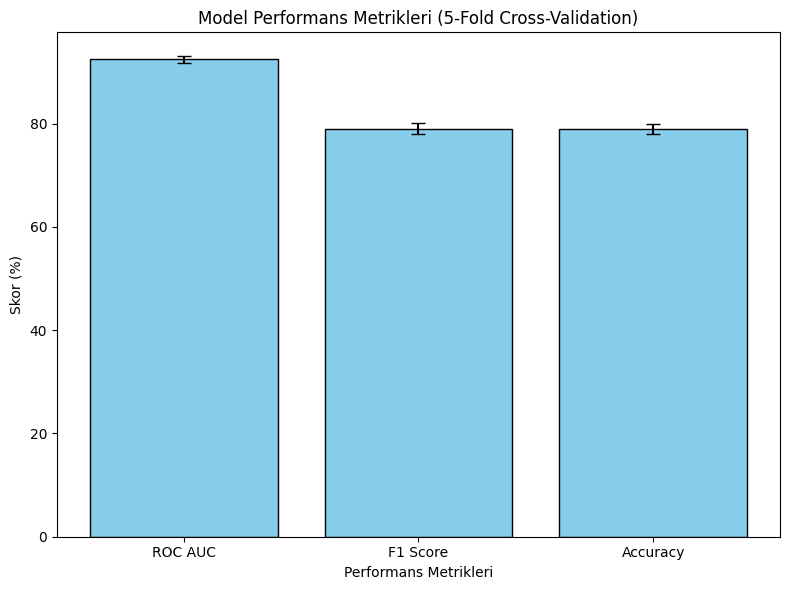

Cross-validation ROC AUC skorları: [0.92575231 0.91818287 0.92240741 0.91954861 0.93512731]
Ortalama ROC AUC: 92.42%
Standart sapma: 0.60%
Cross-validation F1 skorları: [0.80127042 0.77756515 0.78156442 0.78904054 0.80292973]
Ortalama F1 Skoru: 79.05%
Standart sapma: 1.02%
Cross-validation Accuracy skorları: [0.8        0.77777778 0.78055556 0.78888889 0.80277778]
Ortalama Accuracy: 79.00%
Standart sapma: 1.00%


In [ ]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Veriyi hazırlıyoruz
X = df_concat.drop(columns=['Sektör']).drop(columns=['Hisse'])
y = df_concat['Sektör']

# CatBoost modelini oluşturuyoruz
model = CatBoostClassifier(
    iterations=1000,             # Ağaç sayısı
    depth=4,                     # Ağaçların derinliği
    learning_rate=0.1,           # Öğrenme oranı
    l2_leaf_reg=1,               # L2 düzenlileştirme
    loss_function='MultiClass',  # Çok sınıflı sınıflandırma
    random_state=42,             # Sabit random seed
    cat_features=[],             # Kategorik özellikler burada belirtilir, eğer varsa
    task_type='GPU',             # GPU kullanımı
    devices='0',                 # GPU numarası
    verbose=0                    # Eğitimde çıktı vermemek için
)

# StratifiedKFold ile cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ROC AUC ile cross-validation
roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc_ovr')

# F1 Skoru ile cross-validation
f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')

# Accuracy ile cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Sonuçları görselleştiriyoruz
metrics = ['ROC AUC', 'F1 Score', 'Accuracy']
scores = [
    np.mean(roc_auc_scores) * 100,
    np.mean(f1_scores) * 100,
    np.mean(accuracy_scores) * 100
]
std_devs = [
    np.std(roc_auc_scores) * 100,
    np.std(f1_scores) * 100,
    np.std(accuracy_scores) * 100
]

# Bar grafiği ile sonuçları görselleştiriyoruz
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(metrics, scores, yerr=std_devs, capsize=5, color='skyblue', edgecolor='black')

ax.set_xlabel('Performans Metrikleri')
ax.set_ylabel('Skor (%)')
ax.set_title('Model Performans Metrikleri (5-Fold Cross-Validation)')
plt.tight_layout()
plt.show()

# Sonuçları yazdırıyoruz
print(f"Cross-validation ROC AUC skorları: {roc_auc_scores}")
print(f"Ortalama ROC AUC: {np.mean(roc_auc_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(roc_auc_scores) * 100:.2f}%")

print(f"Cross-validation F1 skorları: {f1_scores}")
print(f"Ortalama F1 Skoru: {np.mean(f1_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(f1_scores) * 100:.2f}%")

print(f"Cross-validation Accuracy skorları: {accuracy_scores}")
print(f"Ortalama Accuracy: {np.mean(accuracy_scores) * 100:.2f}%")
print(f"Standart sapma: {np.std(accuracy_scores) * 100:.2f}%")


Burada ise modelimi eğitiyorum ve bunları dosyaladım sonrasında bunları oranlayıp dataframe yaptım daire grafiğiyle gösterdim hepsini

In [ ]:
import pandas as pd
df_concat=pd.read_csv('/content/df_concatall.csv').drop(columns=['Unnamed: 0'])
new_data=pd.read_csv('/content/df_concatall.csv').drop(columns=['Unnamed: 0'])[list(df_concat.columns)]
new_data

Hisse  variance_larger_than_standard_deviation  has_duplicate_max  \
0     AAMI                                      0.0                0.0   
1       AB                                      0.0                0.0   
2     ABCB                                      0.0                0.0   
3      ABL                                      0.0                0.0   
4       AC                                      0.0                0.0   
...    ...                                      ...                ...   
1795  ZETA                                      0.0                0.0   
1796    ZI                                      0.0                1.0   
1797    ZM                                      0.0                0.0   
1798    ZS                                      0.0                0.0   
1799   ZUO                                      0.0                0.0   

      has_duplicate_min  has_duplicate    sum_values    abs_energy    median  \
0                   0.0            1.0  13458.654026  36130.002000  2.551838   
1                   0.0            1.0  13334.119658  36910.841066  2.602827   
2                   0.0            1.0  15467.279881  49595.831804  3.092179   
3                   0.0            1.0  11494.123480  26122.496098  2.273156   
4                   0.0            1.0  16973.316862  57047.272596  3.218937   
...                 ...            ...           ...           ...       ...   
1795                0.0            1.0  11191.637711  24936.974594  2.184927   
1796                0.0            1.0  17650.505533  62014.900066  3.526361   
1797                0.0            1.0  21835.145837  95279.584869  4.127134   
1798                0.0            1.0  19906.582891  80884.590622  3.496508   
1799                0.0            1.0  14377.106170  41310.566272  2.995732   

          mean  length  ...  fourier_entropy.2  fourier_entropy.3  \
0     2.658762  5062.0  ...           0.136002           0.181214   
1     2.634160  5062.0  ...           0.090729           0.170467   
2     3.055567  5062.0  ...           0.090729           0.170467   
3     2.270668  5062.0  ...           0.125256           0.170467   
4     3.353085  5062.0  ...           0.170467           0.343950   
...        ...     ...  ...                ...                ...   
1795  2.210912  5062.0  ...           0.090729           0.136002   
1796  3.486864  5062.0  ...           0.090729           0.170467   
1797  4.313541  5062.0  ...           0.090729           0.136002   
1798  3.932553  5062.0  ...           0.090729           0.090729   
1799  2.840203  5062.0  ...           0.136002           0.215617   

      fourier_entropy.4  permutation_entropy  permutation_entropy.1  \
0              0.546497             1.259392               2.021926   
1              0.429671             1.728502               2.964367   
2              0.440417             1.749650               3.027262   
3              0.316475             0.633669               0.991714   
4              1.038827             1.192390               1.904453   
...                 ...                  ...                    ...   
1795           0.425614             0.596700               0.903386   
1796           0.531534             0.733903               1.110699   
1797           0.305728             0.866565               1.329501   
1798           0.404122             0.944232               1.471699   
1799           0.497646             0.948633               1.480925   

      permutation_entropy.2  permutation_entropy.3  permutation_entropy.4  \
0                  2.815916               3.584629               4.151385   
1                  4.345398               5.784956               7.037377   
2                  4.453849               5.951605               7.227097   
3                  1.353202               1.662048               1.846657   
4                  2.651837               3.367503               3.879491   
...        

Burada ise real estateden bir hisse senedi aldık ve bu sektör için 0 dedi yani Finans sektörüne benzetmiş 0 finans 1 sağlık  2 teknoloji olarak ayarladım

In [ ]:
import pandas as pd
# Verileri oku
hissetahmin= pd.read_csv("/content/emlaktahmin.csv").drop(columns=["Unnamed: 0"])

hissetahmin[hissetahmin['Hisse']=='AAT']

Hisse  variance_larger_than_standard_deviation  has_duplicate_max  \
0   AAT                                      0.0                0.0   

   has_duplicate_min  has_duplicate   sum_values    abs_energy    median  \
0                0.0            1.0  15218.51381  46423.768929  3.065222   

       mean  length  ...  fourier_entropy.2  fourier_entropy.3  \
0  3.005829  5063.0  ...           0.090729           0.170467   

   fourier_entropy.4  permutation_entropy  permutation_entropy.1  \
0           0.504336             1.499354               2.488705   

   permutation_entropy.2  permutation_entropy.3  permutation_entropy.4  \
0               3.555169               4.631206               5.485556   

   mean_n_absolute_max  Tahminler  
0             3.651196          0  

[1 rows x 637 columns]

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Veriyi hazırlıyoruz
X = df_concat.drop(columns=['Sektör', 'Hisse'])
y = df_concat['Sektör']

# CatBoost modelini oluşturuyoruz
model = CatBoostClassifier(
    iterations=1000,             # Ağaç sayısı
    depth=4,                     # Ağaçların derinliği
    learning_rate=0.1,           # Öğrenme oranı
    l2_leaf_reg=1,               # L2 düzenlileştirme
    loss_function='MultiClass',  # Çok sınıflı sınıflandırma
    random_state=42,             # Sabit random seed
    cat_features=[],             # Kategorik özellikler burada belirtilir, eğer varsa
    task_type='GPU',             # GPU kullanımı
    devices='0',                 # GPU numarası
    verbose=0                    # Eğitimde çıktı vermemek için
)

# StratifiedKFold ile cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation uygulama
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# Modeli tam verilerle eğitmek
model.fit(X, y)
predictions = model.predict(new_data.drop(columns=['Hisse','Sektör']))
new_data['Tahminler'] = predictions
#newdata.to_csv("tahmin.csv") burada sırasıyla her sektör için deneme yaptırıyorum ve kaydediyorum bide verisetini tekrar koydum confision matris çıkardım


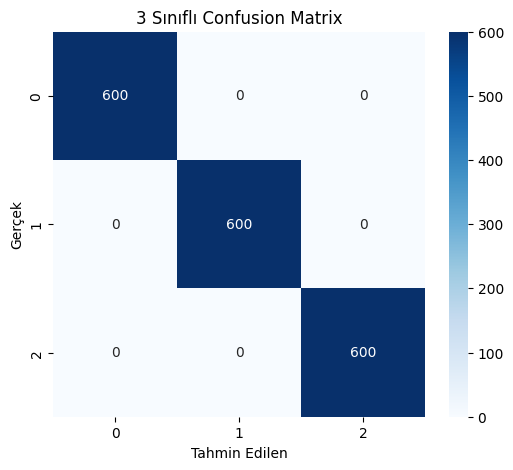

3 Sınıflı Confusion Matrix:
[[600   0   0]
 [  0 600   0]
 [  0   0 600]]


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Gerçek etiketler ve modelin tahmin ettiği etiketler (3 sınıf)
y_true = new_data['Sektör']
y_pred = new_data['Tahminler']

# 3 sınıflı Confusion Matrix hesaplama
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('3 Sınıflı Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# Matrix çıktısını yazdırma
print("3 Sınıflı Confusion Matrix:")
print(cm)


Verisetinin hepsini doğru tahmin etmiş

In [ ]:
import pandas as pd
freq=pd.read_csv("/content/comdistahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
a=list(oranlar.sort_index())

freq=pd.read_csv("/content/consumersttahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
b=list(oranlar.sort_index())

freq=pd.read_csv("/content/emlaktahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
c=list(oranlar.sort_index())

freq=pd.read_csv("/content/endustritahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
d=list(oranlar.sort_index())

freq=pd.read_csv("/content/enerjitahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
e=list(oranlar.sort_index())

freq=pd.read_csv("/content/iletisimhiztahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
f=list(oranlar.sort_index())

freq=pd.read_csv("/content/materyaltahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
g=list(oranlar.sort_index())

freq=pd.read_csv("/content/utilitytahmin.csv")['Tahminler'].value_counts()
toplam=freq.sum()
oranlar = (freq / toplam) * 100
h=list(oranlar.sort_index())


In [ ]:
df1 = pd.DataFrame({
    "consumer-discretionary":a,
    "consumer-staples": b,
    "real-estate":c,
    "industrials":d,
    "energy":e,
    "communication-services":f,
    "materials":g,
    "utilities":h
})
df1.index = ['Finans', 'Sağlık', 'Teknoloji']
df1

consumer-discretionary  consumer-staples  real-estate  industrials  \
Finans                  29.768271         25.409836    70.610687    38.554217   
Sağlık                  26.381462         45.901639    13.358779    19.277108   
Teknoloji               43.850267         28.688525    16.030534    42.168675   

              energy  communication-services  materials  utilities  
Finans     54.365079               21.862348  44.528302  56.363636  
Sağlık     14.682540               31.578947  27.547170  25.454545  
Teknoloji  30.952381               46.558704  27.924528  18.181818

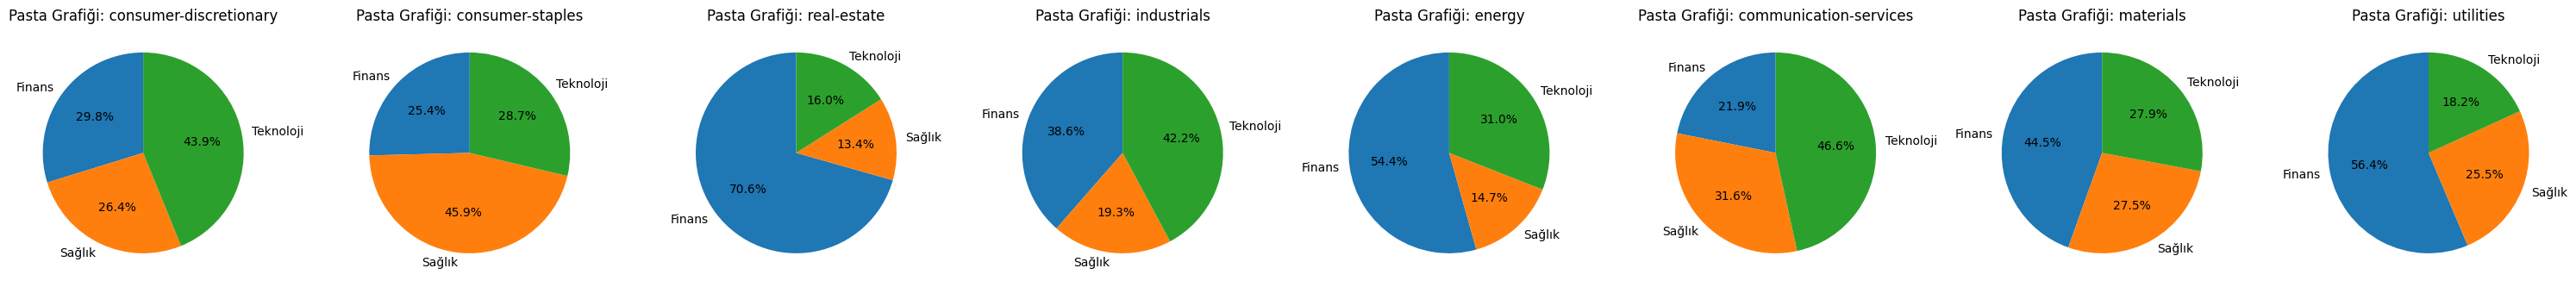

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Her kolon için pasta grafiği çizme
fig, axes = plt.subplots(1, len(df1.columns), figsize=(30, 10))  # Kolon sayısına göre alt grafik düzeni
for i, col in enumerate(df1.columns):
    axes[i].pie(df1[col], labels=df1.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Pasta Grafiği: {col}')

# Grafikleri gösterme
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Verileri oku
ticker_list = pd.read_csv("/content/Finansliste.csv")[:15:].Symbol

# Sıralanmış listede bulunan her sembolün verisini indir
data_close = yf.download(ticker_list.sort_values().tolist(), start='2005-01-01')['Close'].bfill().ffill()


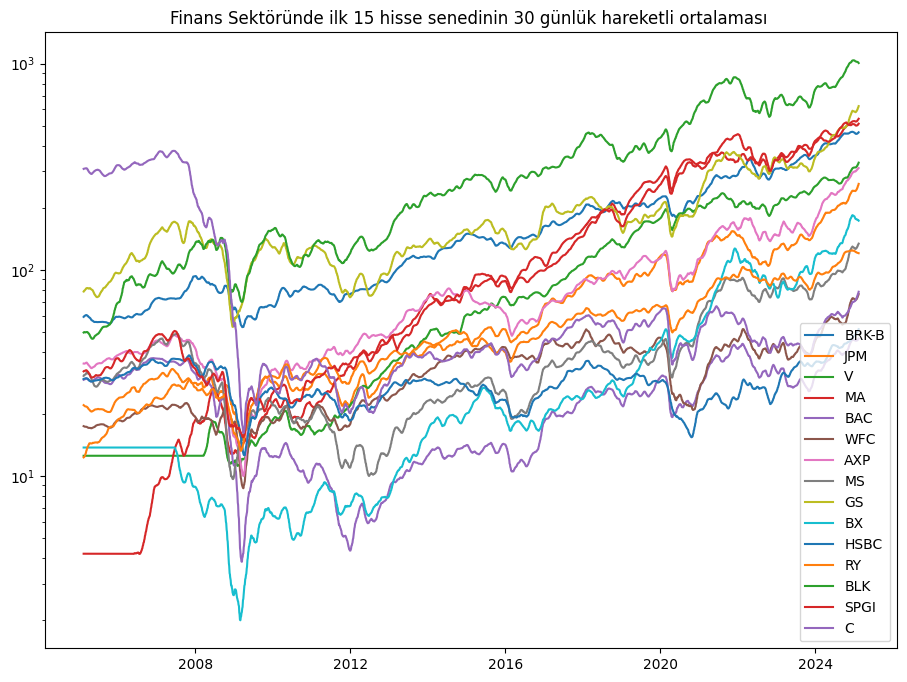

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Finans Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


Burada  finans teknoloji ve sağlıktan  15 şer hisse ile hareketli ortalama grafiği yaptım.

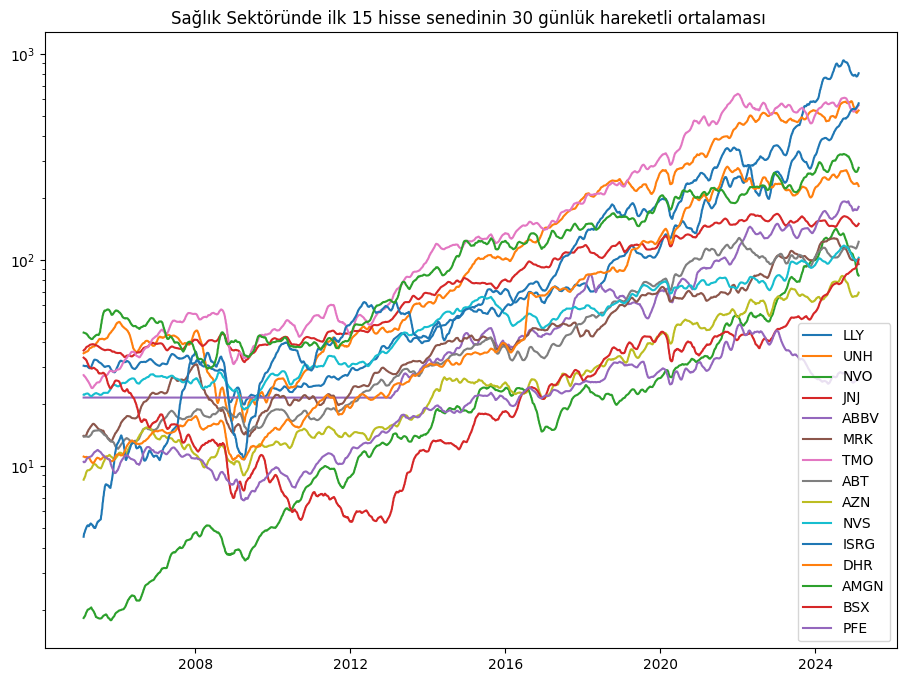

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Sağlık Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


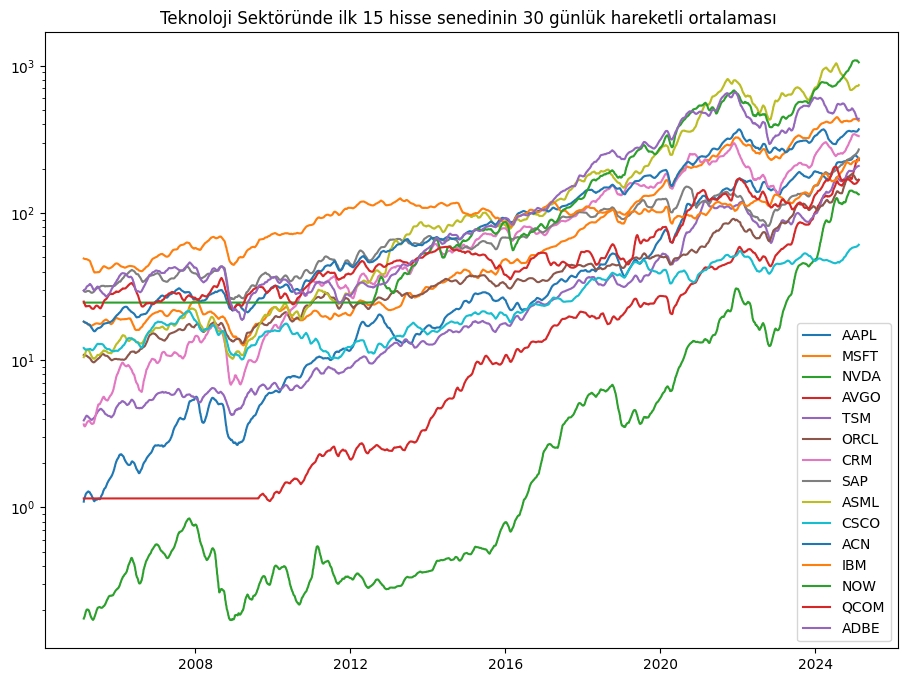

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Teknoloji Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


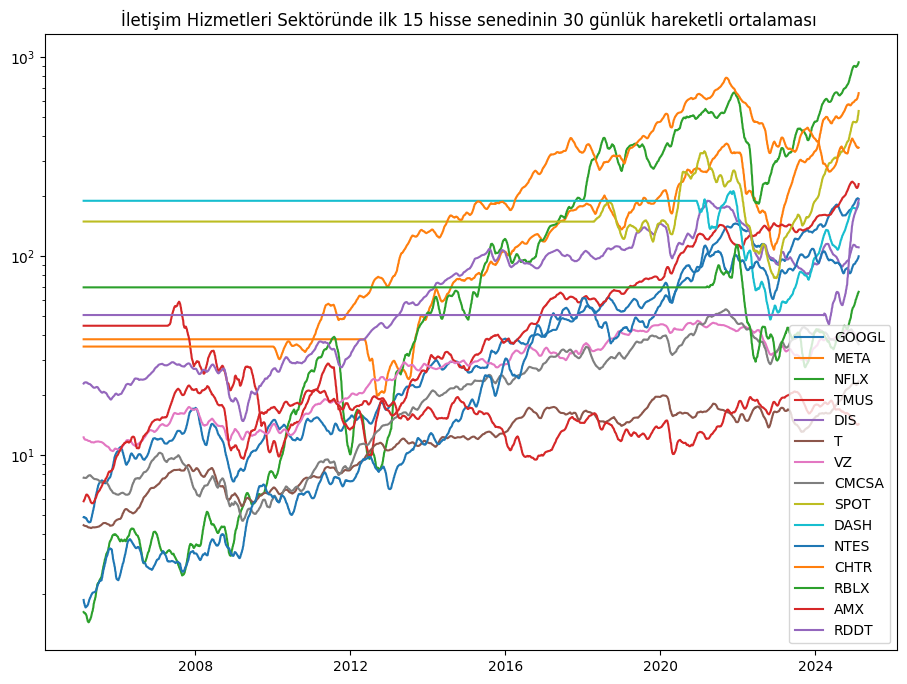

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('İletişim Hizmetleri Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


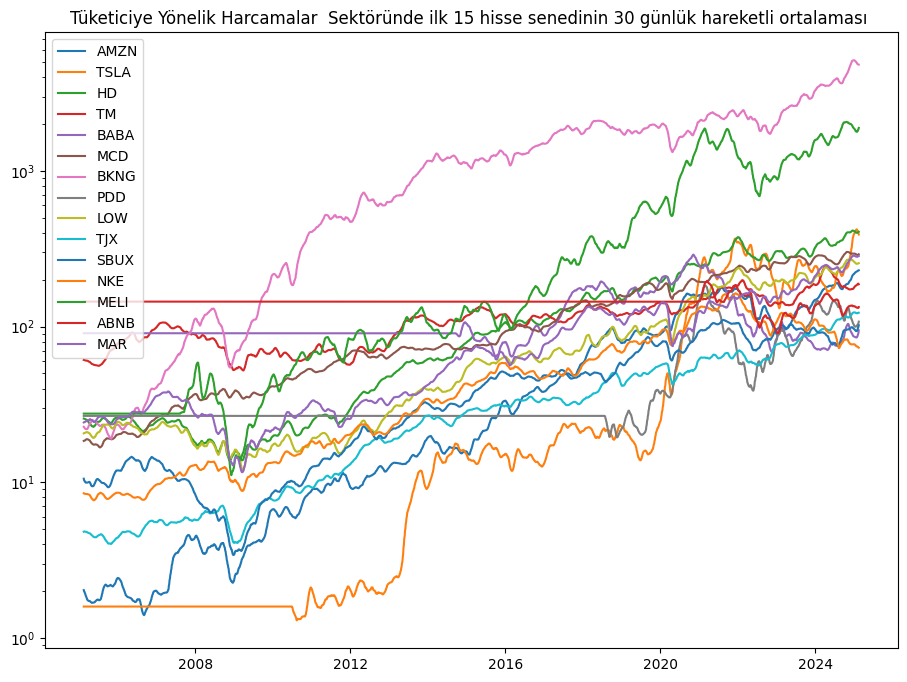

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Tüketiciye Yönelik Harcamalar  Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


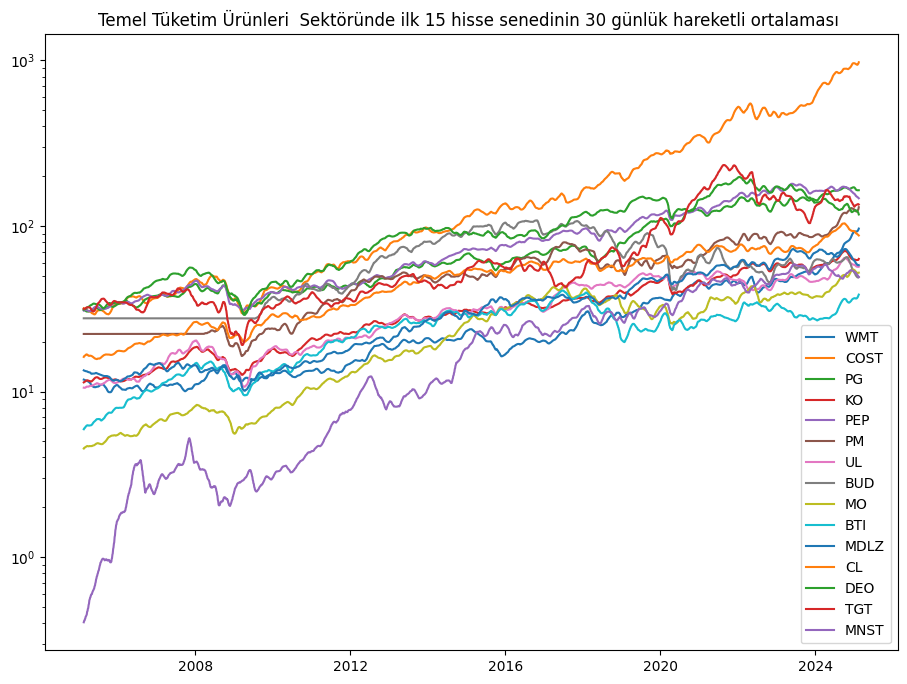

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Temel Tüketim Ürünleri  Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


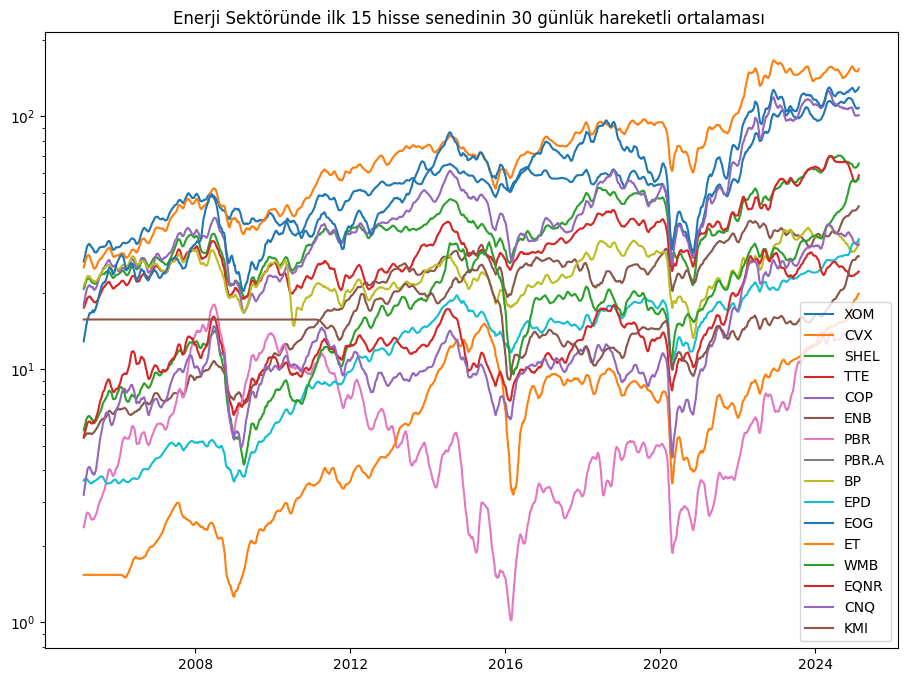

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Enerji Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


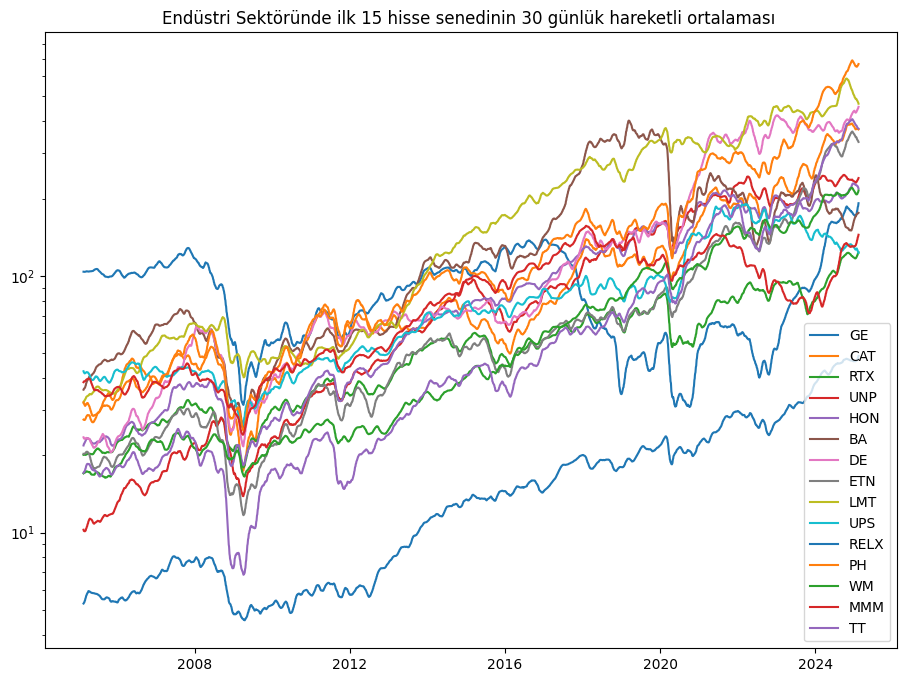

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Endüstri Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


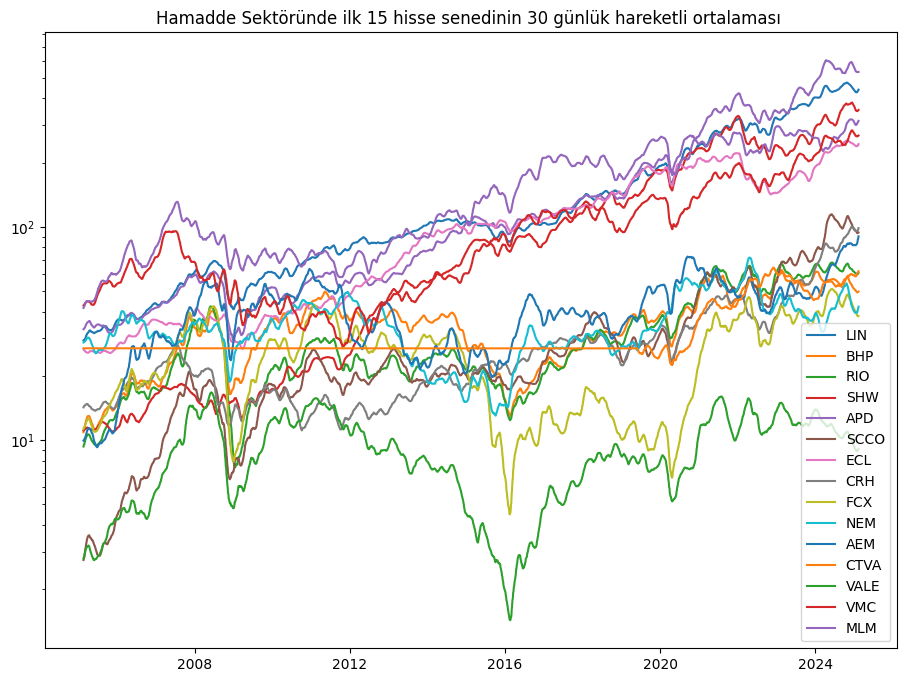

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Hamadde Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


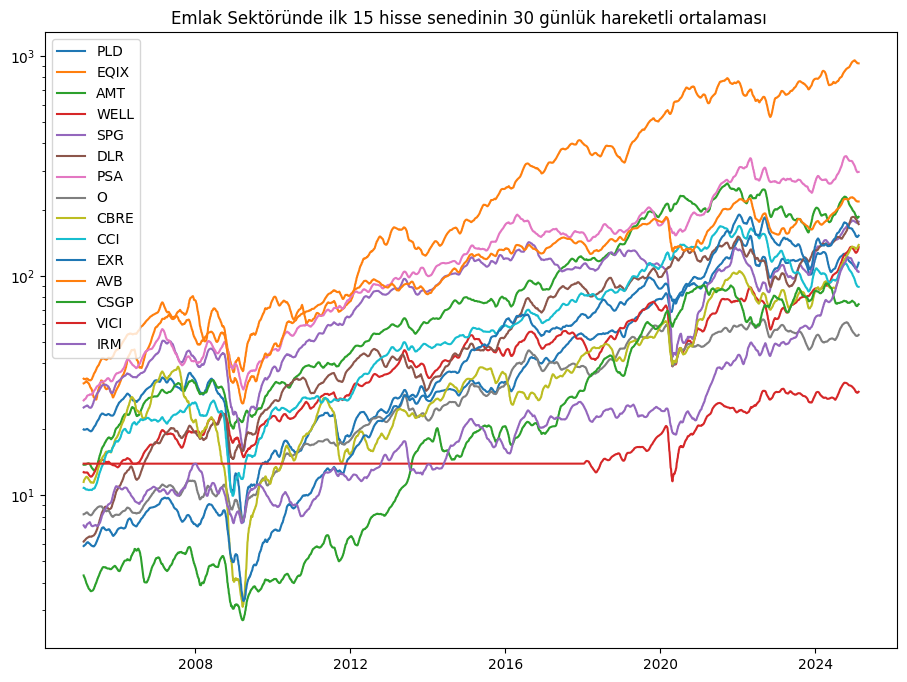

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Emlak Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


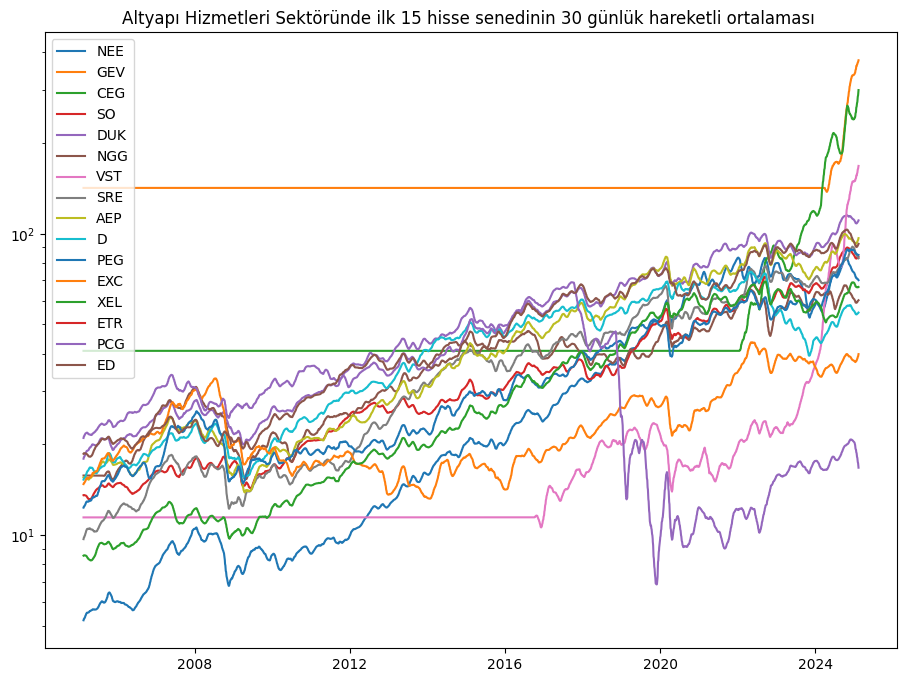

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[11,8])

for ticker in ticker_list:
    plt.plot(data_close[ticker].rolling(window=30).mean(), label = ticker)

plt.yscale('log')
plt.title('Altyapı Hizmetleri Sektöründe ilk 15 hisse senedinin 30 günlük hareketli ortalaması ')
plt.legend()
plt.show()


Grafik dağılımları bu şekildedir hisselerin çoğu bu 3 sektöre benzemektedir